In [ ]:
# include("../finite_difference.jl")
# include("../ode_solver.jl")

# kappa = 1   # diffusion constant
# L = 1.0         # length of spatial domain
# T = 0.5         # total time to solve for

# function u_I(x)
#     # initial temperature distribution
#     y = sin.(pi*x/L)
#     return y
# end

# function u_exact(x,t)
#     # the exact solution
#     y = exp.(-kappa*(pi^2/L^2)*t)*sin.(pi*x/L)
#     return y
# end

# # Set numerical parameters
# mx = 10     # number of gridpoints in space
# mt = 1000   # number of gridpoints in time


# # forward euler Estimate
# weird_x, u_j = finite_difference(u_I, kappa, L, T, mx, mt, forward_euler)
# # Create trace
# f_euler = scatter(x=x, y=u_j, mode="markers", name="forward euler", showlegend=true)


# # backward euler Estimate
# x, u_j = finite_difference(u_I, kappa, L, T, mx, mt, backward_euler)
# # Create trace
# b_euler = scatter(x=x, y=u_j, mode="markers", name="backward euler", showlegend=true)


# # crank nicholson Estimate
# x, u_j = finite_difference(u_I, kappa, L, T, mx, mt, crank_nicholson)
# # Create trace
# c_nicholson = scatter(x=x, y=u_j, mode="markers", name="crank nicholson", showlegend=true)



# # Plot the final result and exact solution
# xx = LinRange(0,L,250)

# # Create solution trace
# exact = scatter(x=xx, y=u_exact(xx,T), mode="lines", name="exact", showlegend=true)

# layout = Layout(
#     xaxis_title = "x",
#     yaxis_title = "u(x,0.5)"
#     )

# plot([exact, f_euler, b_euler, c_nicholson], layout)

In [2]:
using PlotlyJS
using Test
include("../ode_solver.jl")
include("../numerical_shooting.jl")
include("../examples/example_functions.jl")
include("../visualisation.jl")
include("../finite_difference.jl")

deltax = 0.1
deltat = 0.0005
lambda = 0.04999999999999999


crank_nicholson (generic function with 1 method)

In [21]:
@testset verbose = true "Systems Tests" begin

    @testset verbose = true "Week 3 - ode_solver" begin

        @testset verbose = true "Input Tests" begin

            # test error is thrown if t=0 is not included in t
            t = 0:0.1:1
            bad_t = 1:0.1:2
            @test_throws ErrorException solve_ode(f2, [1], bad_t, method="rk4")


            # test error is thrown if x0 is not a matrix
            @test_throws ErrorException solve_ode(f2, 1, t, method="rk4")
            @test_throws ErrorException solve_ode(f2, [1;0], t, method="rk4")
            @test_throws ErrorException solve_ode(f2, [1, 0], t, method="rk4")

        
            # test error is thrown if x0 is not a 1xn matrix
            @test_throws ErrorException solve_ode(f2, [1 2; 3 4], t, method="rk4")


            # test error is thrown if x0 is not correct length
            @test_throws ErrorException solve_ode(f2, [1], t, method="rk4")

        end

       

        # test if solve_ode estimates a simple ODE correctly
        x0 = [1]
        t = 0:1
        e_estimate = solve_ode(f, x0, t, method="rk4")[end][1]
        @test isapprox(e_estimate, ℯ)


        # test if solve_ode estimates systems of ODEs correctly
        x0 = [1 0]
        t = 0:0.1:1
        f2_sol = f2_solution(x0, t)
        f2_numerical_sol = solve_ode(f2, x0, t, method="rk4")
        @test  all(isapprox.(f2_numerical_sol, f2_sol, atol=1e-6))

        
            

    end

    @testset verbose = true "Week 17 - Hopf numerical_shooting" begin

        # test if found limit cycle matches the analytical solution
        u0, T = find_limit_cycle(hopf2d, [-1 0], 6)
        @test isapprox(T, 2*pi)


        # test if solve_ode estimates a Hopf ODE correctly
        t = 0:0.1:T
        hopf_solution = hopf2d_sol(t, beta=1, theta=pi) # adjusted for phase
        hopf_numerical_sol = solve_ode(hopf2d, u0, t, method="rk4")
        @test  all(isapprox.(hopf_numerical_sol, hopf_solution, atol=1e-6))





    end
end

Test Summary:                       | Pass  Total
Systems Tests                       |   10     10
  Week 3 - ode_solver               |    8      8
    Input Tests                     |    6      6
  Week 17 - Hopf numerical_shooting |    2      2


Test.DefaultTestSet("Systems Tests", Any[Test.DefaultTestSet("Week 3 - ode_solver", Any[Test.DefaultTestSet("Input Tests", Any[], 6, false, true)], 2, false, true), Test.DefaultTestSet("Week 17 - Hopf numerical_shooting", Any[], 2, false, true)], 0, false, true)

In [23]:
find_limit_cycle(f2, [1 1], 2; phase_index=1)

([-3.9475089863572066e-12 -7.863820705722446e-11], 2.0000000000116787)

()


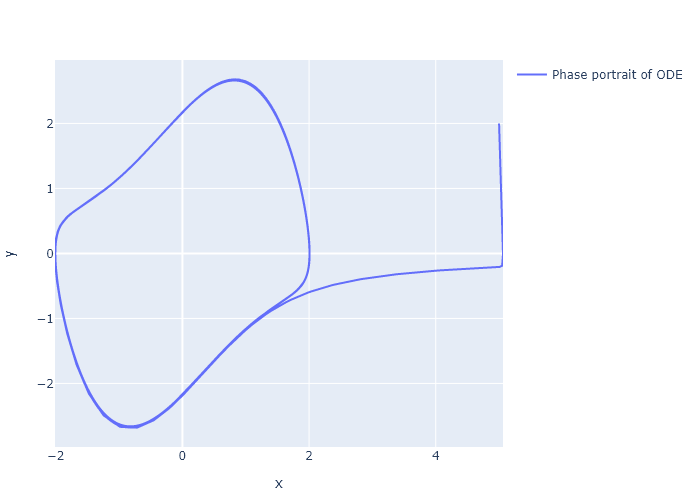

In [6]:
t = 0:.1:100
x0 = [5 2]

plot_phase_portrait(van_der_pol, x0, t, ["x" "y"])

In [8]:
function hopf2d(u, t; beta=1, sigma=-1.0, arg...)

    if length(u) != 2
        error("Please enter two initial conditions for the function.")
    end

    u1, u2 = u
    du1dt = beta*u1 - u2 + sigma*u1*(u1^2 + u2^2)
    du2dt = u1 + beta*u2 + sigma*u2*(u1^2 + u2^2)

    return [du1dt du2dt]
end

function func2(x, t; alpha=2, arg...)
    println("top arg:  ",arg)
    
    y = alpha*hopf2d(x, t; arg...)

    return y
end

# function solve_ode(f, x0, t; method="rk4", Δt=0.01, arg...)

#     # Computation
#     x_series = Matrix{Float64}(undef, 0, length(x0))
#     x_series = [x_series; x0]

#     x = x0
#     for i = 1:(length(t)-1)
#         x = solve_to(f, x, t[i], t[i + 1], Δt, method)
#         x_series = [x_series; x]
#     end
    
#     return x_series
# end



func2 (generic function with 1 method)

In [27]:
solve_ode(hopf2d, [1 2], [0 1]; method="rk4", Δt=0.01)

2×2 Matrix{Float64}:
  1.0       2.0
 -0.541137  0.910266

In [28]:
solve_ode(hopf2d, [1 2], [0 1]; method="rk4", Δt=0.01, beta=0, sigma=0)

2×2 Matrix{Float64}:
  1.0      2.0
 -1.14264  1.92208

In [26]:
include("../ode_solver.jl")
x0 = [1]
t = 0:1
e_estimate = solve_ode(f, x0, t, method="rk4")[end][1]
@test isapprox(e_estimate, ℯ)

Test Passed
  Expression: isapprox(e_estimate, ℯ)
   Evaluated: isapprox(2.718281828234402, ℯ)